BIRCH  Clustring


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import Birch
from sklearn import metrics

In [3]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


select the features and targets

In [4]:
features = titanic[['pclass','sex','fare','embarked']]
features

,pclass,sex,fare,embarked
0,3,male,7.2500,S
1,1,female,71.2833,C
2,3,female,7.9250,S
3,1,female,53.1000,S
4,3,male,8.0500,S
...,...,...,...,...
886,2,male,13.0000,S
887,1,female,30.0000,S
888,3,female,23.4500,S
889,1,male,30.0000,C


In [5]:
targets =   titanic[['survived']]
targets

,survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [6]:
titanic.survived.unique()

array([0, 1], dtype=int64)

In [7]:
titanic.survived.isnull().values.any()

False

In [8]:
features.isnull().any().any()

True

In [9]:
features.isnull().sum()

pclass      0
sex         0
fare        0
embarked    2
dtype: int64

4- fill NaN values

In [10]:
df = features.fillna(method='ffill')
df

C:\Users\Amer\AppData\Local\Temp\ipykernel_11328\2054388158.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = features.fillna(method='ffill')


,pclass,sex,fare,embarked
0,3,male,7.2500,S
1,1,female,71.2833,C
2,3,female,7.9250,S
3,1,female,53.1000,S
4,3,male,8.0500,S
...,...,...,...,...
886,2,male,13.0000,S
887,1,female,30.0000,S
888,3,female,23.4500,S
889,1,male,30.0000,C


In [11]:
df.isnull().any().any()

False

5- Replace catagoris value with some indicator value

In [12]:
new_df =pd.get_dummies(df,columns=['sex','embarked'])
new_df

,pclass,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3,7.2500,False,True,False,False,True
1,1,71.2833,True,False,True,False,False
2,3,7.9250,True,False,False,False,True
3,1,53.1000,True,False,False,False,True
4,3,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...
886,2,13.0000,False,True,False,False,True
887,1,30.0000,True,False,False,False,True
888,3,23.4500,True,False,False,False,True
889,1,30.0000,False,True,True,False,False


6- perform preprocessing

In [15]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(new_df)

In [17]:
scaled.shape

(891, 7)

7- Scaled dataframe

In [18]:
df_scaled = pd.DataFrame(scaled,columns=new_df.columns)
df_scaled

,pclass,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1.0,0.014151,0.0,1.0,0.0,0.0,1.0
1,0.0,0.139136,1.0,0.0,1.0,0.0,0.0
2,1.0,0.015469,1.0,0.0,0.0,0.0,1.0
3,0.0,0.103644,1.0,0.0,0.0,0.0,1.0
4,1.0,0.015713,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
886,0.5,0.025374,0.0,1.0,0.0,0.0,1.0
887,0.0,0.058556,1.0,0.0,0.0,0.0,1.0
888,1.0,0.045771,1.0,0.0,0.0,0.0,1.0
889,0.0,0.058556,0.0,1.0,1.0,0.0,0.0


8- perform 'BIRCH Clustring ' with 2 clusters

In [19]:
birch= Birch(n_clusters=2)
birch.fit(df_scaled)
preds = birch.labels_

9- Add two new colums to the scaled dataframe

In [20]:
df_scaled['Target'] = targets
df_scaled['Predication'] = preds
df_scaled

,pclass,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,Target,Predication
0,1.0,0.014151,0.0,1.0,0.0,0.0,1.0,0,0
1,0.0,0.139136,1.0,0.0,1.0,0.0,0.0,1,1
2,1.0,0.015469,1.0,0.0,0.0,0.0,1.0,1,1
3,0.0,0.103644,1.0,0.0,0.0,0.0,1.0,1,1
4,1.0,0.015713,0.0,1.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...
886,0.5,0.025374,0.0,1.0,0.0,0.0,1.0,0,0
887,0.0,0.058556,1.0,0.0,0.0,0.0,1.0,1,1
888,1.0,0.045771,1.0,0.0,0.0,0.0,1.0,0,1
889,0.0,0.058556,0.0,1.0,1.0,0.0,0.0,1,0


In [21]:
df_scaled.shape

(891, 9)

10- clustering comparsion between targets and predication

In [22]:
cm = metrics.confusion_matrix(targets,preds)

(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

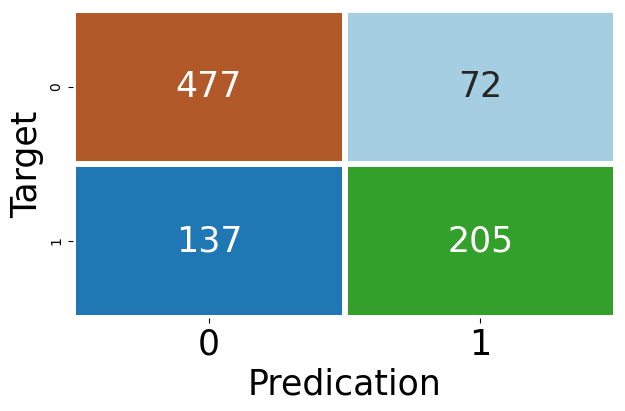

In [30]:
plt.figure(figsize=(7,4))
sns.heatmap(cm,annot=True, fmt='d',linewidths=3, annot_kws={'size':25},cbar=False,cmap=sns.color_palette('Paired'))
plt.ylabel('Target',fontsize=25)
plt.xlabel('Predication',fontsize=25)
plt.xticks(fontsize=25)


In [31]:
df_scaled.Target.value_counts()

Target
0    549
1    342
Name: count, dtype: int64

In [32]:
df_scaled.Predication.value_counts()

Predication
0    614
1    277
Name: count, dtype: int64

In [33]:
print('Accuracy: ', round(metrics.accuracy_score(targets,preds),4))

Accuracy:  0.7654


11- visualize predication 

In [34]:
color_dict = {0:'r',1:'b'}
label_dict = {0:'No', 1: 'Yes'}
market_dict ={0:'d',1: 's'}
alpha_dict ={0:1,1:1}

In [35]:
X= df.pclass.values
Y= df.fare.values

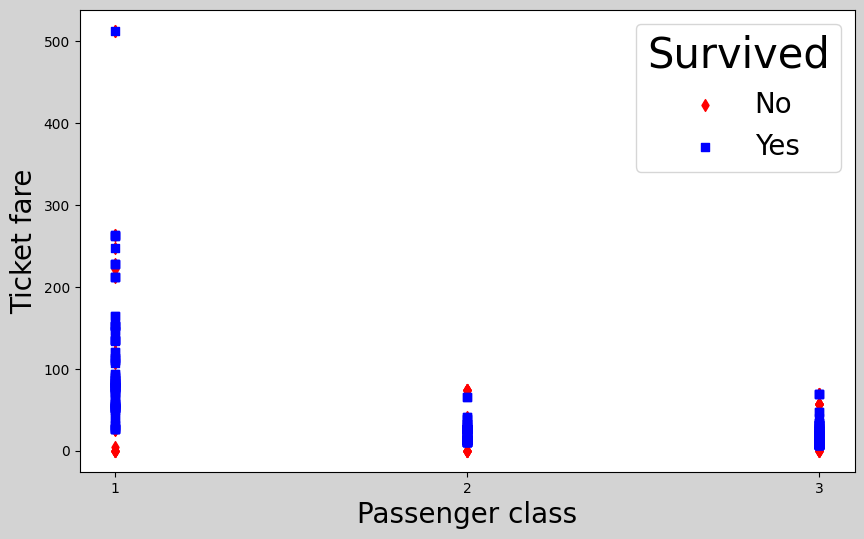

In [36]:
fig = plt.figure(figsize=(10,6))
ax= fig.add_subplot(111)
fig.set_facecolor('lightgrey')

for i in np.unique(preds):
    j= np.where(preds==i)
    ax.scatter(X[j],Y[j],color = color_dict[i],label = label_dict[i],marker=market_dict[i],alpha=alpha_dict[i])

ax.set_xlabel('Passenger class',fontsize=20)
ax.set_ylabel('Ticket fare',fontsize=20)
ax.xaxis.set_ticks([1,2,3])
ax.legend(title='Survived',fontsize=20,title_fontsize=30)